In [1]:
import scipy.signal as scipy_signal
import numpy as np

sr = 1000   # sample rate (number of points sampled per second)
s = 3   # number of seconds
n = sr * s    # number of total time stamp samples

std_min = 10    
std_max = 30
amp_min = 1
amp_max = 20
num_pulses = 1
std_length = 3

def build_empty_signal(n, sr):
    t = np.arange(n) / sr
    x = np.zeros(n)
    return x, t

def gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length):
    signal_length = len(x)
    
    for _ in range(num_pulses):
        std = np.random.uniform(std_min, std_max)
        amp = np.random.uniform(amp_min, amp_max)
        
        window_length = int(2 * std_length * std)  # Ensure the window length is odd
        if window_length % 2 == 1: window_length -= 1
                
        window = scipy_signal.windows.gaussian(window_length, std=std)
        window = amp*window
        
        pos = np.random.randint(window_length, signal_length-window_length//2)
        
        start = pos - (window_length // 2) 
        end = pos + (window_length // 2 )
        
        window_segment = window[:end - start]  # Adjust the length of the window segment
        x[start:end] += window_segment

    return x, amp

In [2]:
import random

def generate_noise_freq(N, A, duration, sample_rate, freqs = []):
    
    t = np.linspace(0, duration, int(sample_rate*duration))  # Time axis
    
    noise = np.zeros_like(t)
    
    for freq in freqs:
        noise += A*np.sin(2*np.pi*freq*t)
        
    return noise

def generate_noise_harmonic(N, A, duration, sample_rate, freq, max_num_harmonics):
    
    t = np.linspace(0, duration, int(sample_rate*duration))  # Time axis
    num_harmonics = random.randint(2, max_num_harmonics)
    print("number of harmonics: ", num_harmonics - 1)
    
    noise = np.zeros_like(t)
    
    for har in range(1,num_harmonics):
        amp = random.uniform(0, A/10)
        print("amp: ", amp)
        noise += amp*np.sin(2*np.pi*freq*har*t)
        
    return noise

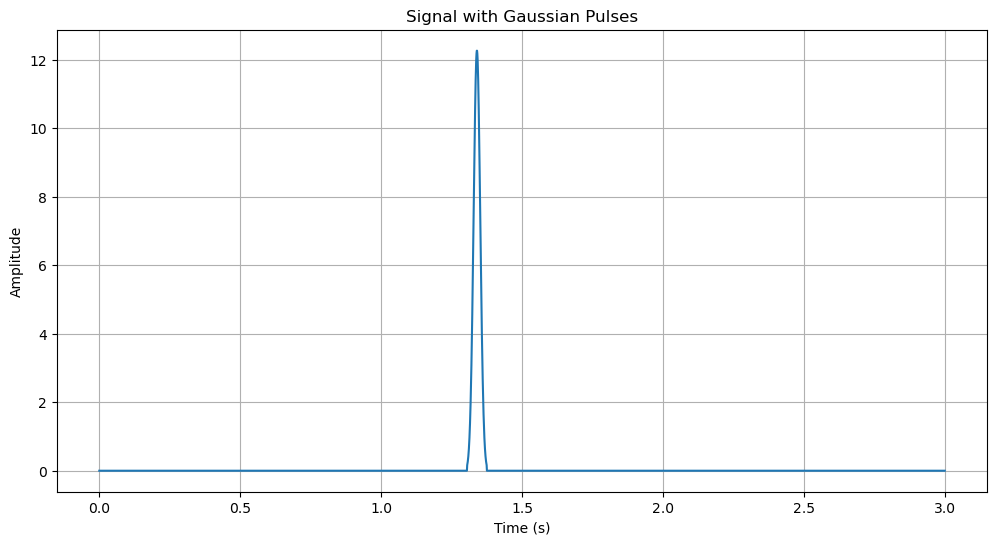

In [3]:
import matplotlib.pyplot as plt

x, t = build_empty_signal(n, sr)
x, amp = gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length)

plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with Gaussian Pulses')
plt.grid(True)
plt.show()


number of harmonics:  8
amp:  0.2351470392293798
amp:  0.9093014747250239
amp:  0.6686610115745456
amp:  0.09296131652033492
amp:  0.5399339897072127
amp:  1.0662661408453402
amp:  0.4825595340503668
amp:  1.1498537523957064


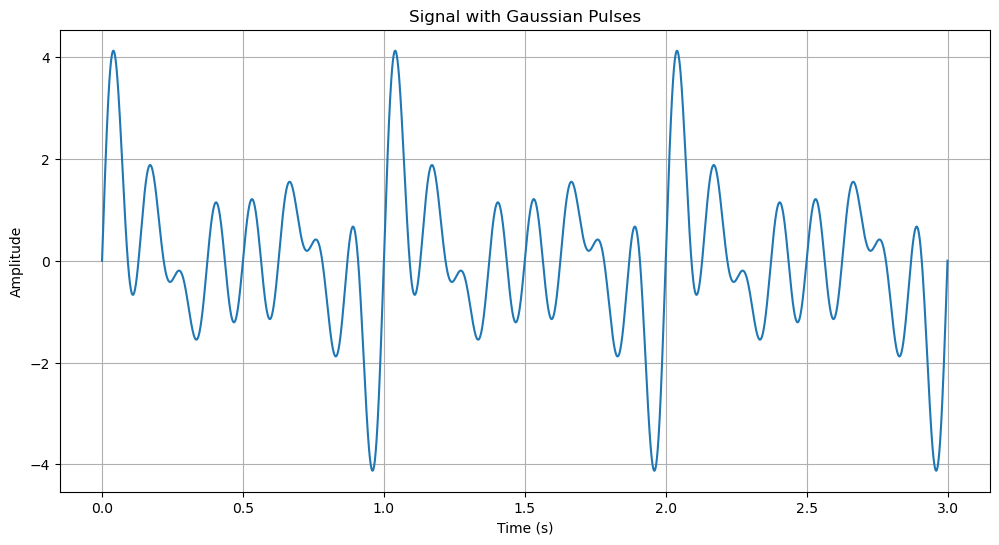

In [4]:
freq = 1
max_num_harmonics = 10
noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)

plt.figure(figsize=(12, 6))
plt.plot(t, noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal with Gaussian Pulses')
plt.grid(True)
plt.show()

number of harmonics:  8
amp:  0.1446597091955578
amp:  0.20403345535102757
amp:  0.24134776668030455
amp:  0.33504226761393097
amp:  0.20938837957385675
amp:  0.09941913569741781
amp:  0.2700332684983701
amp:  0.20832603878700792


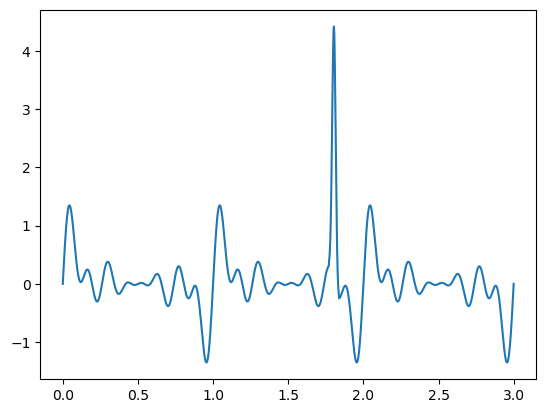

In [5]:
x, t = build_empty_signal(n, sr)
x, amp = gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length)
freq = 1
max_num_harmonics = 10
noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)
plt.plot(t, x+noise)

number of harmonics:  2
amp:  0.3730831694955293
amp:  0.3224565311833468


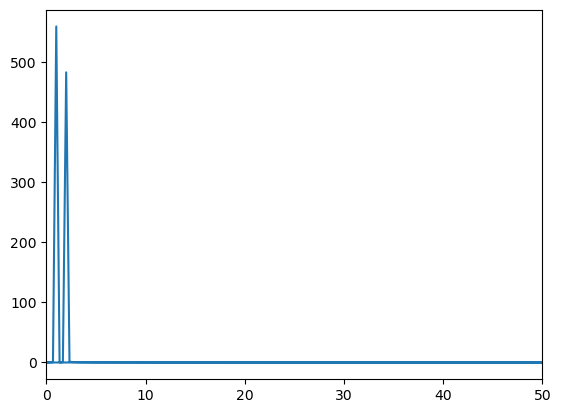

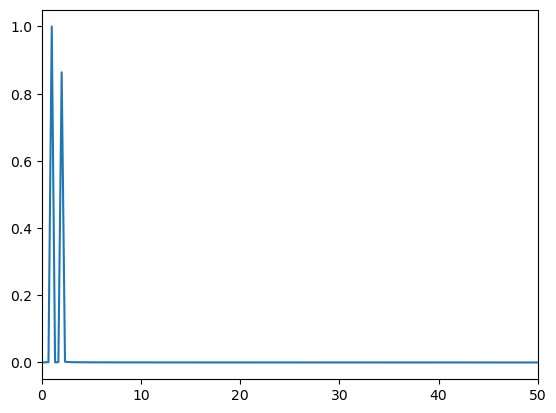

In [6]:
freq = 1
max_num_harmonics = 10
noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)

fft_noise = np.fft.fft(noise)
f = np.fft.fftfreq(n, d=1/sr)

fft_noise_labels = np.abs(fft_noise[:int(len(fft_noise)//2)])
normalized_labels_fft = abs((fft_noise_labels - min(fft_noise_labels)) / (max(fft_noise_labels) - min(fft_noise_labels)))   # normalize delta functions to [0,1]

plt.plot(f, np.abs(fft_noise))
plt.xlim(0,50)
plt.show()

plt.plot(f[:int(len(fft_noise)//2)], normalized_labels_fft)
plt.xlim(0,50)
plt.show()

number of harmonics:  4
amp:  0.2253140872473694
amp:  0.3545676073208894
amp:  0.33963493937320843
amp:  0.25897890332644175


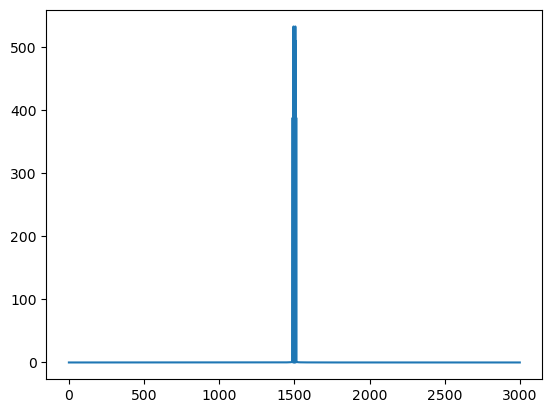

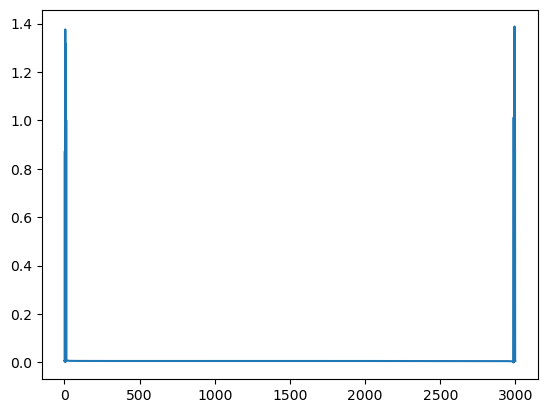

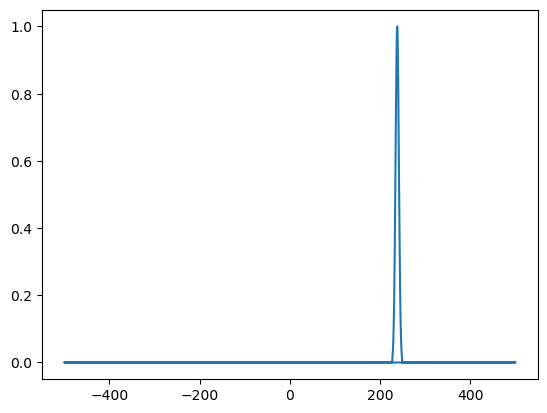

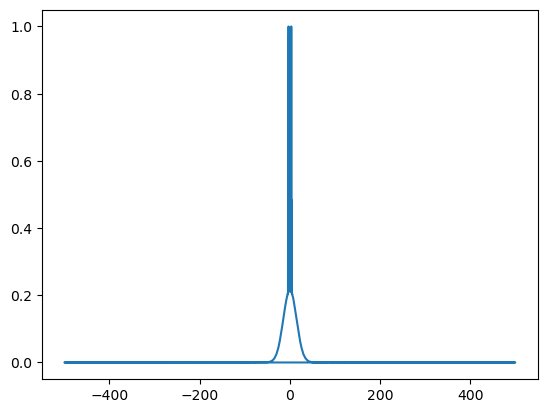

In [7]:
freq = 1
max_num_harmonics = 10

x, t = build_empty_signal(n, sr)
x, amp = gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length)
noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)

fft_signal = np.fft.fft(x)
f = np.fft.fftfreq(n, d=1/sr)

fft_noise = np.fft.fft(noise)
normalized_noise_fft = abs((fft_noise - min(fft_noise)) / (max(fft_noise) - min(fft_noise)))   # normalize delta functions to [0,1]

# fft_noise_labels = np.abs(fft_noise[:int(len(fft_noise)//2)])
normalized_signal_fft = (x - min(x)) / (max(x) - min(x))   # normalize delta functions to [0,1]

normalized_fft = (abs(fft_signal+fft_noise) - min(abs(fft_signal+fft_noise))) / (max(abs(fft_signal+fft_noise)) - min(abs(fft_signal+fft_noise)))

plt.plot(np.fft.fftshift(np.abs(fft_noise)))
plt.show()

plt.plot(normalized_noise_fft)
plt.show()

plt.plot(f, normalized_signal_fft)
plt.show()

plt.plot(f, normalized_fft)
plt.show()

In [8]:
normalized_labels_fft

array([0.00000000e+00, 3.48561211e-04, 1.01506903e-03, ...,
       5.71553111e-06, 5.71551544e-06, 5.71550603e-06])

In [9]:
np.fft.fftshift(np.abs(fft_noise))[1503]

338.3468186778723

In [10]:
np.fft.fftshift(f)[1500:1510]

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

# Amplitude/Power Spectrum for Discrete Frequency Spectra (a few dominant sine waves)

number of harmonics:  2
amp:  0.3535451822434121
amp:  0.14567035068714368


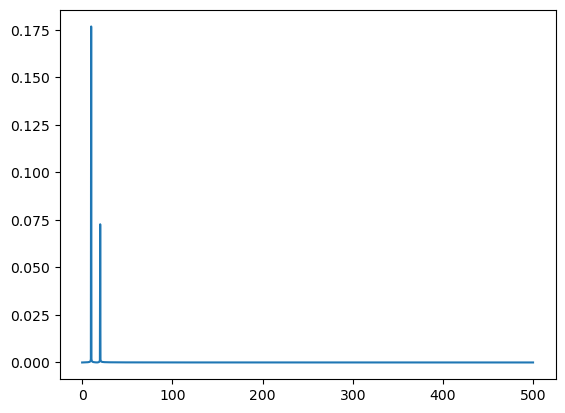

In [11]:
def generate_noise_harmonic(N, A, duration, sample_rate, freq, max_num_harmonics):
    
    t = np.linspace(0, duration, int(sample_rate*duration))  # Time axis
    num_harmonics = random.randint(2, max_num_harmonics)
    print("number of harmonics: ", num_harmonics - 1)
    
    noise = np.zeros_like(t)
    
    for har in range(1,num_harmonics):
        amp = random.uniform(0, A/10)
        print("amp: ", amp)
        noise += amp*np.sin(2*np.pi*freq*har*t)
        
    return noise


freq = 10
max_num_harmonics = 5
noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)

fft_noise = np.fft.fft(noise)
amplitude_spectrum = np.abs(fft_noise) / len(fft_noise)
f = np.fft.fftfreq(n, d=1/sr)

# fft_noise_labels = np.abs(fft_noise[:int(len(fft_noise)//2)])
# normalized_labels_fft = abs((fft_noise_labels - min(fft_noise_labels)) / (max(fft_noise_labels) - min(fft_noise_labels)))   # normalize delta functions to [0,1]

plt.plot(f[:len(f) // 2], amplitude_spectrum[:len(f) // 2])

# plt.plot(f, np.abs(fft_noise))
# plt.xlim(0,50)
# plt.show()

# plt.plot(f[:int(len(fft_noise)//2)], normalized_labels_fft)
# plt.xlim(0,50)
# plt.show()

In [12]:
amplitude_spectrum

array([2.18459510e-18, 4.73821088e-06, 9.50407414e-06, ...,
       1.43258397e-05, 9.50407414e-06, 4.73821088e-06])

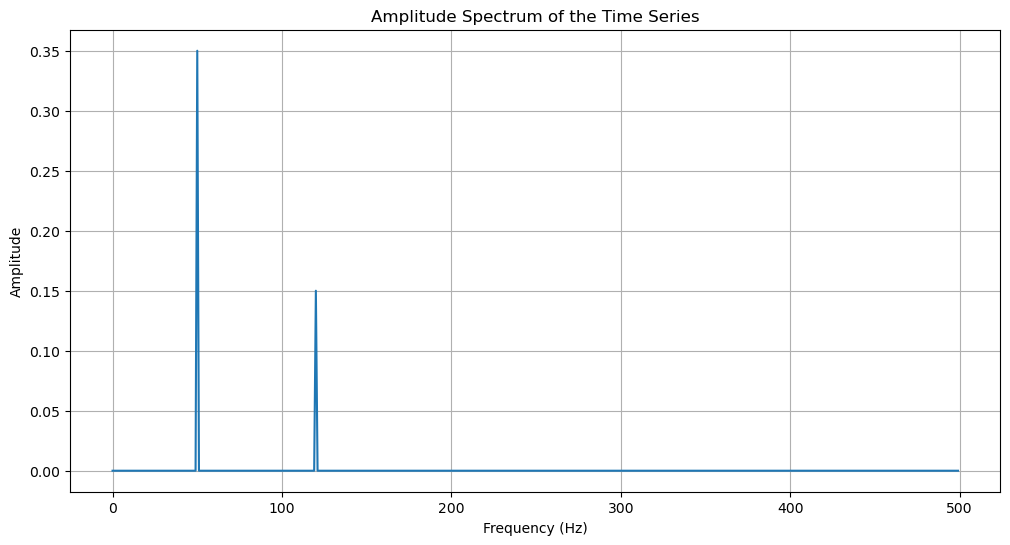

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a sample time series
Fs = 1000  # Sampling frequency (samples per second)
T = 1 / Fs  # Sampling interval (seconds per sample)
t = np.linspace(0, 1, Fs, endpoint=False)  # Time vector (1 second duration)
f1 = 50  # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)

# Create a time series with two different frequency components
x = 0.7 * np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)

# Step 2: Compute the FFT of the time series
X = np.fft.fft(x)

# Step 3: Calculate the amplitude spectrum
amplitude_spectrum = np.abs(X) / len(x)  # Normalize by dividing by the length

# Step 4: Calculate the frequency bins
frequencies = np.fft.fftfreq(len(x), T)  # Create frequency bins

# Step 5: Plot the amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies) // 2], amplitude_spectrum[:len(frequencies) // 2])
plt.title('Amplitude Spectrum of the Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [14]:
import torch
def generate_dataset_freq(size, n, s, sr, freqs, max_num_harmonics, std_min, std_max, amp_min, amp_max, num_pulses, std_length):
    X = []
    Y = []  
    Y_onehot = []   # labels that are delta functions in frequency space
    
    for i in range(size):
        x, t = build_empty_signal(n, sr)
        x, amp = gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length)
        
        fft_noises = None
        fft_signal = np.fft.fft(x)
        for freq in freqs:
            noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)
            fft_noise = np.fft.fft(noise)
            if fft_noises is None:
                fft_noises = fft_noise
            else:
                fft_noises += fft_noise
            
        inp = (abs(fft_signal+fft_noises) - min(abs(fft_signal+fft_noises))) / (max(abs(fft_signal+fft_noises)) - min(abs(fft_signal+fft_noises)))
        label = abs((fft_noises - min(fft_noises)) / (max(fft_noises) - min(fft_noises)))
        
        inp = np.fft.fftshift(inp)
        label = np.fft.fftshift(label)
        
        f = np.fft.fftfreq(n, d=1/sr)

        # label one hot
        f_shifted = np.fft.fftshift(f)
        y_onehot = [0]*n
        
        # for j in range(1, num_harmonics):
        #     freq_idx = np.where(abs(f_shifted) == j*freq)[0]
        #     for f_id in freq_idx:
        #         y_onehot[f_id] = 1
            
        X.append(inp)
        Y.append(label) # labels that are delta functions in frequency space
        Y_onehot.append(y_onehot)   # one hot labels 
        
    plt.plot(X[-1])
    plt.show()
    plt.plot(Y[-1])
    return torch.tensor(X), torch.tensor(Y), torch.tensor(Y_onehot)

number of harmonics:  2
amp:  0.02170213461695725
amp:  0.2503294709296807
number of harmonics:  4
amp:  0.013728740440569836
amp:  0.05870441370544935
amp:  0.11766183783479159
amp:  0.1119729492502839
number of harmonics:  3
amp:  0.049870447570723085
amp:  0.16375925426126048
amp:  0.13128956649647103
number of harmonics:  9
amp:  0.08213262214934353
amp:  0.45379068019712354
amp:  0.2760282156315218
amp:  0.09070568700413144
amp:  0.49000413800014075
amp:  0.12735215458511057
amp:  0.2876333753591666
amp:  0.17949678748372375
amp:  0.4986315900116676
number of harmonics:  4
amp:  0.4737443520232438
amp:  0.3194543887417336
amp:  0.2292278802501025
amp:  0.2725657608486912
number of harmonics:  2
amp:  0.1414903586588555
amp:  0.16483590126979933
number of harmonics:  2
amp:  0.7364319611087216
amp:  0.7493063867785886
number of harmonics:  9
amp:  0.6748589766182208
amp:  0.4906262185750765
amp:  0.4965109990987651
amp:  0.06610605571395299
amp:  0.09456787695313523
amp:  0.4764365

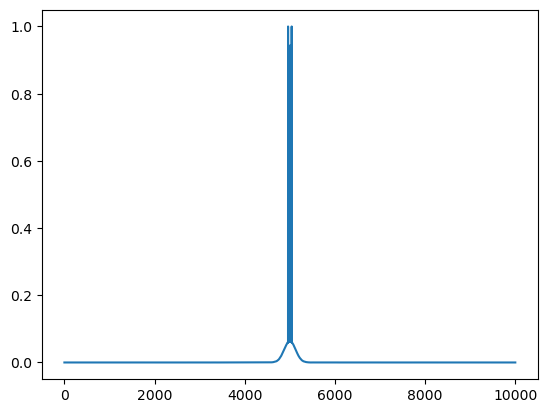

/var/folders/cr/lf3ftc1562j666v_rns8jtc00000gn/T/ipykernel_14671/952618730.py:45: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  return torch.tensor(X), torch.tensor(Y), torch.tensor(Y_onehot)


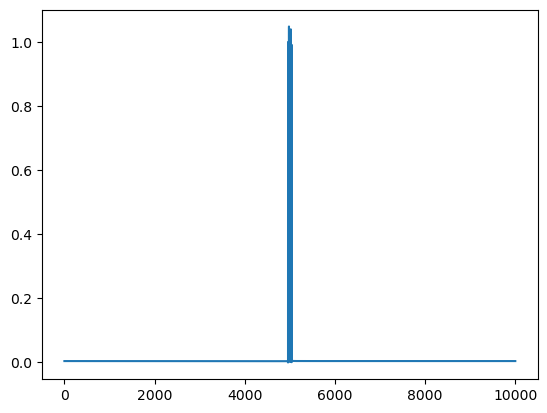

In [15]:
sr = 1000   # sample rate (number of points sampled per second)
s = 10   # number of seconds
n = sr * s    # number of total time stamp samples

std_min = 10    
std_max = 30
amp_min = 1
amp_max = 20
num_pulses = 1
std_length = 3

train_size = 10
eval_size = 100
freq = 1
max_num_harmonics = 10

X_train, Y_train, Y_onehot_train = generate_dataset_freq(train_size, n, s, sr, [freq], max_num_harmonics, std_min, std_max, amp_min, amp_max, num_pulses, std_length)


In [18]:
def generate_dataset_time(size, n, s, sr, freqs, max_num_harmonics, std_min, std_max, amp_min, amp_max, num_pulses, std_length):
    X = []
    Y = []  
    # Y_onehot = []   # labels that are delta functions in frequency space
    
    for i in range(size):
        x, t = build_empty_signal(n, sr)
        x, amp = gauss_sig(x, t, std_min, std_max, amp_min, amp_max, num_pulses, std_length)
        
        noises = None
        for freq in freqs: 
            noise = generate_noise_harmonic(n, amp, s, sr, freq, max_num_harmonics)
            
            if noises is None:
                noises = noise
            else:
                noises += noise
        # fft_signal = np.fft.fft(x)
        # fft_noise = np.fft.fft(noise)
        
        # inp = (abs(fft_signal+fft_noise) - min(abs(fft_signal+fft_noise))) / (max(abs(fft_signal+fft_noise)) - min(abs(fft_signal+fft_noise)))
        # label = abs((fft_noise - min(fft_noise)) / (max(fft_noise) - min(fft_noise)))
        
        # inp = np.fft.fftshift(inp)
        # label = np.fft.fftshift(label)
        
        # f = np.fft.fftfreq(n, d=1/sr)

        # label one hot
        # f_shifted = np.fft.fftshift(f)
        # y_onehot = [0]*n
        
        # for j in range(1, num_harmonics):
        #     freq_idx = np.where(abs(f_shifted) == j*freq)[0]
        #     for f_id in freq_idx:
        #         y_onehot[f_id] = 1
            
        X.append(noise+x)
        Y.append(noise) # labels that are delta functions in frequency space
        # Y_onehot.append(y_onehot)   # one hot labels 
    plt.plot(X[-1])
    plt.plot(Y[-1])
    return torch.tensor(X), torch.tensor(Y)
    

    

number of harmonics:  9
amp:  0.7826508091427653
amp:  0.9743065581105621
amp:  0.9448910022973703
amp:  1.642853042494483
amp:  0.06694647516839823
amp:  0.40906187829997714
amp:  1.3115780688089036
amp:  1.6249560895475115
amp:  1.9239103709361987
number of harmonics:  3
amp:  0.536641415754099
amp:  0.21258643082282508
amp:  0.22504108210260163
number of harmonics:  4
amp:  0.3189405916301609
amp:  0.037051267959449505
amp:  0.102002805448038
amp:  0.1499115059706577
number of harmonics:  4
amp:  0.06895366356676724
amp:  0.23772094447555933
amp:  0.01853437663573709
amp:  0.1164190234081447
number of harmonics:  8
amp:  0.5050775499506835
amp:  0.3982599236990715
amp:  0.07034874165114988
amp:  0.3359283284860542
amp:  0.6178775637156718
amp:  0.19592082264484936
amp:  0.09318053038862655
amp:  0.20853994433149756
number of harmonics:  4
amp:  0.5509722877506779
amp:  0.1755014695216047
amp:  0.3577704283854928
amp:  0.1187656197563457
number of harmonics:  1
amp:  0.29972952199949

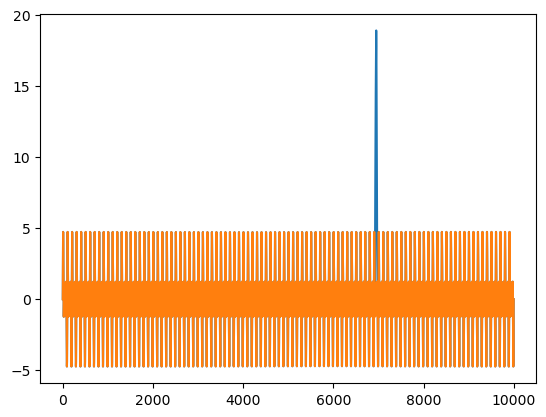

In [22]:
X_train, Y_train = generate_dataset_time(train_size, n, s, sr, [freq, 10], max_num_harmonics, std_min, std_max, amp_min, amp_max, num_pulses, std_length)
